### new_catalogs
- Testing MPL-9 Catalogues and matching

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits

import catalog
import catalog_init 
import catalog_process
import catalog_plot
import copy

import imp 
imp.reload(catalog)
imp.reload(catalog_plot)
imp.reload(catalog_process)
imp.reload(catalog_init)

# plotting defaults.
from matplotlib.pyplot import rcParams
catalog_plot.default(rcParams)

### First up - loading in the new pipe3d catalog and testing the lambda_R measures against the original in MPL-8

In [2]:
basepath = '/Users/chrisduckworth/astronomy/projects/spin_bias/catalogues/'
outpath = '/Users/chrisduckworth/astronomy/projects/spin_bias/plots/mpl8_vs_mpl9/'

pipe3d_mpl8 = pd.read_csv(basepath + 'manga.Pipe3D_v2_5_3.csv')
pipe3d_mpl9_fits = Table.read(basepath+'SDSS15Pipe3D_clean_v2_7_1.fits', format='fits')
pipe3d_mpl9 = pipe3d_mpl9_fits.to_pandas()

pipe3d_mpl9['plateifu'] = pipe3d_mpl9.plateifu.str.decode('utf-8')
pipe3d_mpl9['MaNGAID'] = pipe3d_mpl9.MaNGAID.str.decode('utf-8') 
pipe3d_combo = pipe3d_mpl8.merge(pipe3d_mpl9, left_on='plateifu', right_on='plateifu')

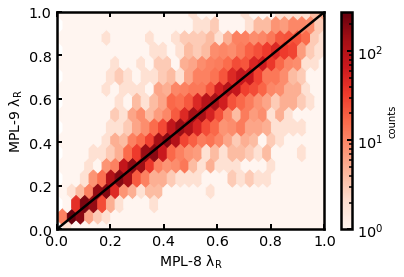

In [31]:
fig, ax = plt.subplots()
hb = ax.hexbin(pipe3d_combo.lambda_re.values, pipe3d_combo.Lambda_Re.values, cmap='Reds', gridsize=30, bins='log')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax.set_xlabel('MPL-8 $\mathrm{\lambda_R}$', fontsize=14)
ax.set_ylabel('MPL-9 $\mathrm{\lambda_R}$', fontsize=14)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

x = np.linspace(0, 1)
ax.plot(x, x, c='k')
plt.savefig(outpath+'lambdaR_scatter.pdf', format='pdf', bbox_inches='tight')

In [12]:
# initiating catalog class objects.
total = catalog.Catalog(basepath, version='mpl9', match_to_lim=True)
total.match_to_cw(basepath, version='mpl9', sigma=5)
total.remove_satellites(group_cat='lim') 

# loading old version of catalogs.
old = catalog.Catalog(basepath, version='mpl8', match_to_lim=False)
old.match_to_cw(basepath, version='mpl6')
old.remove_satellites(group_cat='yang', keep_zero_mass=False)

In [13]:
total.df.shape, old.df.shape

((3987, 422), (2032, 419))

In [15]:
# matching old and new catalogs and plotting halo mass distributions.
new_old = total.df.merge(old.df, on='mangaid')

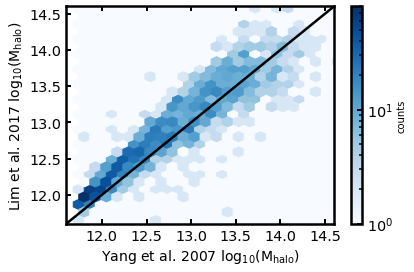

In [35]:
fig, ax = plt.subplots()
hb = ax.hexbin(new_old.halo_mass_stel.values, new_old.log_halo_mass.values, cmap='Blues', gridsize=25, bins='log')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax.set_xlabel('Yang et al. 2007 $\mathrm{log_{10}(M_{halo})}$', fontsize=14)
ax.set_ylabel('Lim et al. 2017 $\mathrm{log_{10}(M_{halo})}$', fontsize=14)
ax.set_xlim([11.6, 14.6])
ax.set_ylim([11.6, 14.6])

x = np.linspace(11.5, 15)
ax.plot(x, x, c='k')
plt.savefig(outpath+'mhalo_scatter.pdf', format='pdf', bbox_inches='tight')